# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
#from scipy.stats import linregress
from scipy import stats


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
size = 1500
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=size)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=size)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
num_cities = len(cities)
num_cities
cities_no_clean_df = pd.DataFrame(cities, columns =['City'])
cities_no_clean_df.head()

,City
0,villa bruzual
1,puerto ayora
2,atuona
3,kapaa
4,clyde river


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'

#columns = ['Latitude','Longitude','Temperature','Humidity']

city = []
latitude = []
longitude = []
temperature = []
max_temp = []
humidity = []
wind_speed = []
cloudiness = []
country = []

num_set = 1
num_city = 0

skipped_row = []
# Build query URL
#query_url = url + 'lat=' + latitud + '&lon=' + longitud + "&appid=" + api_key + "&units=metric"
start_time = time.time()
for index, row in cities_no_clean_df.iterrows():
    city_name = row['City']

    
    cities_url = url + 'q=' + city_name   + '&appid=' + weather_api_key + '&units=' + units
    city_json = requests.get(cities_url).json()
    try:
        num_city +=1

        print(f'Processing Record: {num_city } of Set: {num_set} | {city_name}')

        #cities_no_clean_df.loc[index,'Country'] = 
        city.append(city_json["name"])
        latitude.append(city_json['coord']['lat'])
        longitude.append(city_json['coord']['lon'])
        temperature.append(city_json['main']['temp'])
        max_temp.append(city_json['main']['temp_max'])
        humidity.append(city_json['main']['humidity'])
        wind_speed.append(city_json['wind']['speed'])
        cloudiness.append(city_json['clouds']['all'])
        country.append(city_json['sys']['country'])
   
    except KeyError: 
        print(f"Missing field/result... skipping row {index + 1} .")


#Pausing the code in case de API has a requests limit over time
    if num_city > 50:
        num_city = 0
        num_set += 1
        time.sleep(0.5)   

    
    
end_time = time.time()



Processing Record: 1 of Set: 1 | villa bruzual
Processing Record: 2 of Set: 1 | puerto ayora
Processing Record: 3 of Set: 1 | atuona
Processing Record: 4 of Set: 1 | kapaa
Processing Record: 5 of Set: 1 | clyde river
Processing Record: 6 of Set: 1 | busselton
Processing Record: 7 of Set: 1 | albany
Processing Record: 8 of Set: 1 | kodiak
Processing Record: 9 of Set: 1 | mataura
Processing Record: 10 of Set: 1 | khonuu
Missing field/result... skipping row 10 .
Processing Record: 11 of Set: 1 | rikitea
Processing Record: 12 of Set: 1 | tumannyy
Missing field/result... skipping row 12 .
Processing Record: 13 of Set: 1 | solovetskiy
Missing field/result... skipping row 13 .
Processing Record: 14 of Set: 1 | kijang
Processing Record: 15 of Set: 1 | pavlodar
Processing Record: 16 of Set: 1 | georgetown
Processing Record: 17 of Set: 1 | marcona
Missing field/result... skipping row 17 .
Processing Record: 18 of Set: 1 | zhangjiakou
Processing Record: 19 of Set: 1 | ushuaia
Processing Record: 2

Processing Record: 18 of Set: 4 | correntina
Processing Record: 19 of Set: 4 | faanui
Processing Record: 20 of Set: 4 | fredericksburg
Processing Record: 21 of Set: 4 | chuy
Processing Record: 22 of Set: 4 | faya
Processing Record: 23 of Set: 4 | pervomayskoye
Processing Record: 24 of Set: 4 | verkhnevilyuysk
Processing Record: 25 of Set: 4 | calabar
Processing Record: 26 of Set: 4 | belmonte
Processing Record: 27 of Set: 4 | ligayan
Processing Record: 28 of Set: 4 | saint-pascal
Missing field/result... skipping row 181 .
Processing Record: 29 of Set: 4 | tezu
Processing Record: 30 of Set: 4 | mae hong son
Processing Record: 31 of Set: 4 | codrington
Processing Record: 32 of Set: 4 | avarua
Processing Record: 33 of Set: 4 | mantua
Processing Record: 34 of Set: 4 | moose factory
Processing Record: 35 of Set: 4 | kahului
Processing Record: 36 of Set: 4 | qadirpur ran
Processing Record: 37 of Set: 4 | hailar
Processing Record: 38 of Set: 4 | college
Processing Record: 39 of Set: 4 | poya


Processing Record: 48 of Set: 7 | bambanglipuro
Processing Record: 49 of Set: 7 | torbay
Processing Record: 50 of Set: 7 | vostok
Processing Record: 51 of Set: 7 | skjervoy
Processing Record: 1 of Set: 8 | cayenne
Processing Record: 2 of Set: 8 | mercedes
Processing Record: 3 of Set: 8 | erdenet
Processing Record: 4 of Set: 8 | buraydah
Processing Record: 5 of Set: 8 | palabuhanratu
Missing field/result... skipping row 362 .
Processing Record: 6 of Set: 8 | puerto carreno
Processing Record: 7 of Set: 8 | rungata
Missing field/result... skipping row 364 .
Processing Record: 8 of Set: 8 | myszkow
Processing Record: 9 of Set: 8 | pacific grove
Processing Record: 10 of Set: 8 | jardim
Processing Record: 11 of Set: 8 | cognac
Processing Record: 12 of Set: 8 | tawkar
Missing field/result... skipping row 369 .
Processing Record: 13 of Set: 8 | aksarka
Processing Record: 14 of Set: 8 | cukai
Processing Record: 15 of Set: 8 | labutta
Missing field/result... skipping row 372 .
Processing Record:

Processing Record: 19 of Set: 11 | crixas
Processing Record: 20 of Set: 11 | nambucca heads
Processing Record: 21 of Set: 11 | mehamn
Processing Record: 22 of Set: 11 | narsaq
Processing Record: 23 of Set: 11 | geraldton
Processing Record: 24 of Set: 11 | rondonopolis
Processing Record: 25 of Set: 11 | tuatapere
Processing Record: 26 of Set: 11 | bonavista
Processing Record: 27 of Set: 11 | omsukchan
Processing Record: 28 of Set: 11 | almaznyy
Processing Record: 29 of Set: 11 | carutapera
Processing Record: 30 of Set: 11 | sao jose da coroa grande
Processing Record: 31 of Set: 11 | gulu
Processing Record: 32 of Set: 11 | celestun
Processing Record: 33 of Set: 11 | obala
Processing Record: 34 of Set: 11 | port blair
Processing Record: 35 of Set: 11 | broome
Processing Record: 36 of Set: 11 | gazalkent
Processing Record: 37 of Set: 11 | san patricio
Processing Record: 38 of Set: 11 | omurtag
Processing Record: 39 of Set: 11 | marquette
Processing Record: 40 of Set: 11 | aguada de pasajer

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
duration = end_time - start_time
print(f'The process lasted {duration} seconds')
time.time()

The process lasted 199.40069103240967 seconds


1619752714.924368

In [5]:
#cities_df = cities_no_clean_df.dropna().reset_index()

cities_df = pd.DataFrame(
    {
        'City' : city,
        'Latitude': latitude,
        'Longitude' : longitude,
        'Temperature' : temperature,
        'Max Temp' : max_temp,
        'Humidity': humidity,
        'Wind Speed (mph)' : wind_speed,
        'Cloudiness' : cloudiness,
        'Country' : country
        
    }
)
cities_df.head(30)




,City,Latitude,Longitude,Temperature,Max Temp,Humidity,Wind Speed (mph),Cloudiness,Country
0,Villa Bruzual,9.3328,-69.1208,71.08,71.08,95,2.26,100,VE
1,Puerto Ayora,-0.7393,-90.3518,75.09,75.09,86,8.32,21,EC
2,Atuona,-9.8000,-139.0333,79.43,79.43,70,4.76,11,PF
3,Kapaa,22.0752,-159.3190,74.44,75.00,59,4.00,11,US
4,Clyde River,70.4692,-68.5914,23.00,23.00,100,3.44,90,CA
5,Busselton,-33.6500,115.3333,60.62,61.00,73,3.00,24,AU
6,Albany,42.6001,-73.9662,54.91,55.99,89,5.79,100,US
7,Saint Paul Harbor,57.7900,-152.4072,44.60,44.60,81,5.75,75,US
8,Mataura,-46.1927,168.8643,55.00,55.00,72,13.00,33,NZ
9,Rikitea,-23.1203,-134.9692,77.07,77.07,66,12.48,85,PF


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:


cities_humidity_df = cities_df.loc[cities_df['Humidity'] <=100,:]
cities_humidity_df.columns


Index(['City', 'Latitude', 'Longitude', 'Temperature', 'Max Temp', 'Humidity',
       'Wind Speed (mph)', 'Cloudiness', 'Country'],
      dtype='object')

In [7]:
#  Get the indices of cities that have humidity over 100%.
cities_humidity_100_df = cities_df.loc[cities_df['Humidity'] > 100,:]
cities_humidity_100_df.index.to_numpy()
cities_humidity_100_df

,City,Latitude,Longitude,Temperature,Max Temp,Humidity,Wind Speed (mph),Cloudiness,Country


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

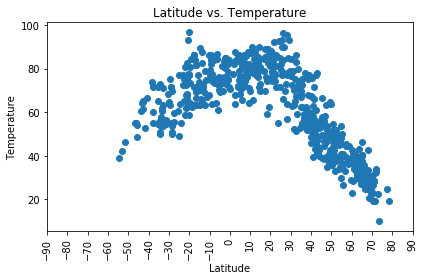

In [9]:
latitude = cities_humidity_df['Latitude']
temperature = cities_humidity_df['Temperature']
ticks = range(-90,100,10)
humidity = cities_humidity_df['Humidity']
cloudiness = cities_humidity_df['Cloudiness']
wind_speed = cities_humidity_df['Wind Speed (mph)']

lat_temp = plt.scatter(x = latitude,y = temperature)
plt.title('Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.xticks(ticks, rotation=90)


image_base = 'Lat_VS_Temperature' 
image_name = image_base + '.png'
file_path = os.path.join('output_data',image_name)
plt.tight_layout()

plt.savefig(file_path)

plt.show()


## Latitude vs. Humidity Plot

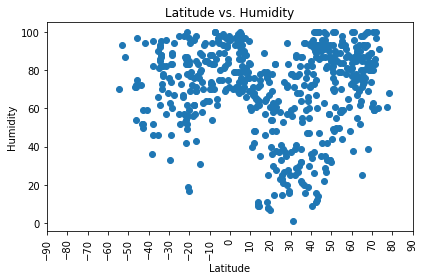

In [10]:
lat_humidity = plt.scatter(x = latitude,y = humidity)
plt.title('Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.xticks(ticks, rotation=90)

image_base = 'Latitude_VS_Humidity Plot' 
image_name = image_base + '.png'
file_path = os.path.join('output_data',image_name)
plt.tight_layout()

plt.savefig(file_path)

plt.show()



## Latitude vs. Cloudiness Plot

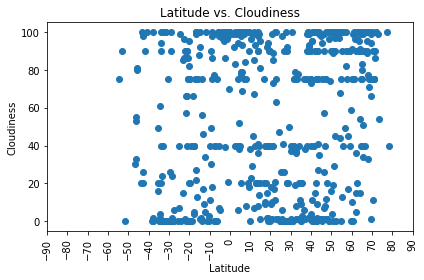

In [11]:
lat_cloudiness = plt.scatter(x = latitude,y = cloudiness)
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.xticks(ticks, rotation=90)

image_base = 'Latitude vs. Cloudiness Plot' 
image_name = image_base + '.png'
file_path = os.path.join('output_data',image_name)
plt.tight_layout()

plt.savefig(file_path)

plt.show()

## Latitude vs. Wind Speed Plot

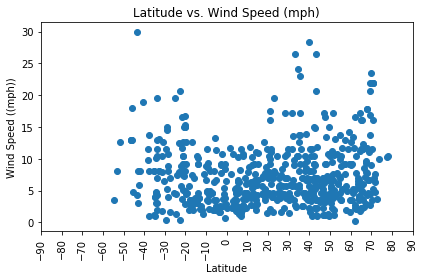

In [12]:
lat_wind = plt.scatter(x = latitude,y = wind_speed)
plt.title('Latitude vs. Wind Speed (mph)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed ((mph))')
plt.xticks(ticks, rotation=90)

image_base = 'Latitude vs. Wind Speed Plot' 
image_name = image_base + '.png'
file_path = os.path.join('output_data',image_name)
plt.tight_layout()

plt.savefig(file_path)

plt.show()

## Linear Regression

In [13]:
#Norther Hemisphere
northern = cities_humidity_df.loc[cities_humidity_df['Latitude']>=0,:]
northern_lat = northern.loc[:,'Latitude'].astype(float)


southern = cities_humidity_df.loc[cities_humidity_df['Latitude']<0,:]
southern_lat = southern.loc[:,'Latitude'].astype(float)



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

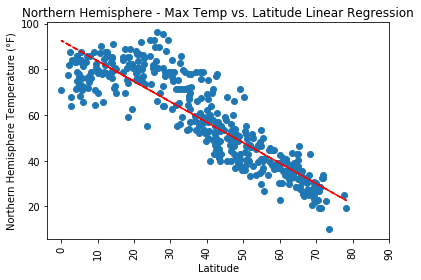

In [14]:
northern_temp = northern.loc[:,'Max Temp'].astype(float)
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(northern_lat, northern_temp)

vc_fit = vc_slope * northern_lat + vc_int

plt.scatter(northern_lat,northern_temp)
plt.plot(northern_lat,vc_fit,"--",color = 'r')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xticks(range(0,100,10), rotation=90)
plt.xlabel('Latitude')
plt.ylabel('Northern Hemisphere Temperature (°F)')

image_base = 'Northern_Hemispher_VS_Max_Temp' 
image_name = image_base + '.png'
file_path = os.path.join('output_data',image_name)
plt.tight_layout()

plt.savefig(file_path)

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

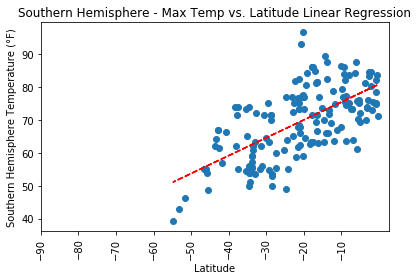

In [15]:
southern_temp = southern.loc[:,'Max Temp'].astype(float)

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(southern_lat, southern_temp)

vc_fit = vc_slope * southern_lat + vc_int

plt.scatter(southern_lat,southern_temp)
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.plot(southern_lat,vc_fit,"--",color = 'r')
plt.xticks(range(-90,0,10), rotation=90)
plt.xlabel('Latitude')
plt.ylabel('Southern Hemisphere Temperature (°F)')

image_base = 'Southern_Hemispher_VS_Max_Temp' 
image_name = image_base + '.png'
file_path = os.path.join('output_data',image_name)
plt.tight_layout()

plt.savefig(file_path)


plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

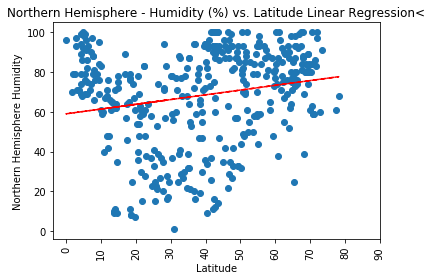

In [16]:
northern_humidity = northern.loc[:,'Humidity'].astype(float)

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(northern_lat, northern_humidity)

vc_fit = vc_slope * northern_lat + vc_int

plt.scatter(northern_lat,northern_humidity)
plt.plot(northern_lat,vc_fit,"--",color = 'r')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression<')
plt.xticks(range(0,100,10), rotation=90)
plt.xlabel('Latitude')
plt.ylabel('Northern Hemisphere Humidity')

image_base = 'Northern_Hemispher_VS_Humidity' 
image_name = image_base + '.png'
file_path = os.path.join('output_data',image_name)
plt.tight_layout()

plt.savefig(file_path)



plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

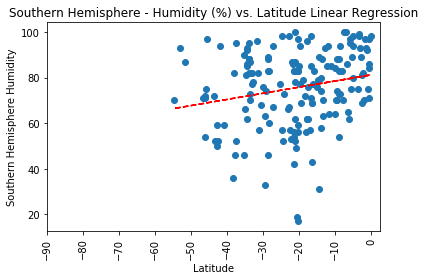

In [17]:
southern_humidity = southern.loc[:,'Humidity'].astype(float)

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(southern_lat, southern_humidity)

vc_fit = vc_slope * southern_lat + vc_int

plt.scatter(southern_lat,southern_humidity)
plt.plot(southern_lat,vc_fit,"--",color = 'r')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xticks(range(-90,10,10), rotation=90)
plt.xlabel('Latitude')
plt.ylabel('Southern Hemisphere Humidity')

image_base = 'Southern_Hemispher_VS_Humidity' 
image_name = image_base + '.png'
file_path = os.path.join('output_data',image_name)
plt.tight_layout()

plt.savefig(file_path)


plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

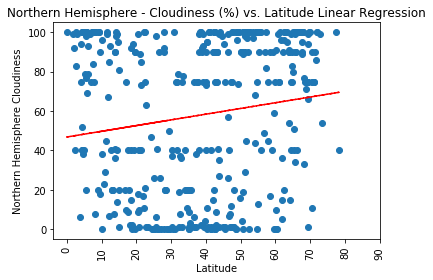

In [18]:
northern_cloudiness = northern.loc[:,'Cloudiness'].astype(float)

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(northern_lat, northern_cloudiness)

vc_fit = vc_slope * northern_lat + vc_int

plt.scatter(northern_lat,northern_cloudiness)
plt.plot(northern_lat,vc_fit,"--",color = 'r')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xticks(range(0,100,10), rotation=90)
plt.xlabel('Latitude')
plt.ylabel('Northern Hemisphere Cloudiness')

image_base = 'Northern_Hemispher_VS_Cloudiness' 
image_name = image_base + '.png'
file_path = os.path.join('output_data',image_name)
plt.tight_layout()

plt.savefig(file_path)

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

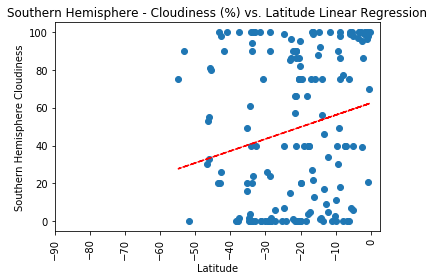

In [19]:
southern_cloudiness = southern.loc[:,'Cloudiness'].astype(float)

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(southern_lat, southern_cloudiness)

vc_fit = vc_slope * southern_lat + vc_int

plt.scatter(southern_lat,southern_cloudiness)
plt.plot(southern_lat,vc_fit,"--",color = 'r')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xticks(range(-90,10,10), rotation=90)
plt.xlabel('Latitude')
plt.ylabel('Southern Hemisphere Cloudiness')

image_base = 'Southern_Hemispher_VS_Cloudiness' 
image_name = image_base + '.png'
file_path = os.path.join('output_data',image_name)
plt.tight_layout()

plt.savefig(file_path)

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

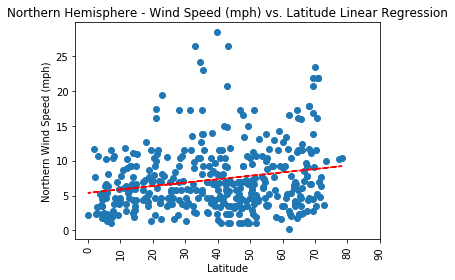

In [20]:
northern_wind = northern.loc[:,'Wind Speed (mph)'].astype(float)

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(northern_lat, northern_wind)

vc_fit = vc_slope * northern_lat + vc_int

plt.scatter(northern_lat,northern_wind)
plt.plot(northern_lat,vc_fit,"--",color = 'r')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xticks(range(0,100,10), rotation=90)
plt.xlabel('Latitude')
plt.ylabel('Northern Wind Speed (mph)')

image_base = 'Northern_Hemispher_VS_Wind_Speed' 
image_name = image_base + '.png'
file_path = os.path.join('output_data',image_name)
plt.tight_layout()

plt.savefig(file_path)

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

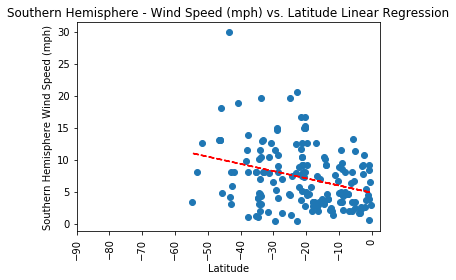

In [21]:
southern_wind = southern.loc[:,'Wind Speed (mph)'].astype(float)

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(southern_lat, southern_wind)

vc_fit = vc_slope * southern_lat + vc_int

plt.scatter(southern_lat,southern_wind)
plt.plot(southern_lat,vc_fit,"--",color = 'r')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xticks(range(-90,10,10), rotation=90)
plt.xlabel('Latitude')
plt.ylabel('Southern Hemisphere Wind Speed (mph)')

image_base = 'Southern_Hemispher_VS_Wind_Speed' 
image_name = image_base + '.png'
file_path = os.path.join('output_data',image_name)
plt.tight_layout()

plt.savefig(file_path)


plt.show()